In [1]:
import requests

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point

In [109]:
api_key = '8a48fc5081214f07a90492a24a996211'

In [59]:
census_tract_path = '/Users/Albert/Jupyter/us_tracts/us_tract.shp'

# zipcode

In [60]:
tracts = gpd.read_file(census_tract_path)

In [61]:
print(tracts.shape)
tracts.head(2)

(74101, 14)


,region_id,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,44003022400,44,3,22400,44003022400,224.00,Census Tract 224,G5020,S,6636437,6446407,41.658322,-71.426914,"POLYGON ((-71.46854 41.63864, -71.46774 41.638..."
1,32003003612,32,3,3612,32003003612,36.12,Census Tract 36.12,G5020,S,2727271,0,36.224649,-115.198176,"POLYGON ((-115.20755 36.22450, -115.20754 36.2..."


In [62]:
coords = tracts[tracts['region_id'].str.startswith('36061')].centroid
xs = coords.apply(lambda x: x.x).tolist()
ys = coords.apply(lambda x: x.y).tolist()

D:\Softwares\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [110]:
url = 'https://api.breezometer.com/air-quality/v2/historical/hourly?lat=%s&lon=%s&key=%s&datetime=2021-04-01T23:00:00' % (ys[0], xs[0], api_key)

In [111]:
r = requests.get(url)

In [112]:
features = r.json()

In [113]:
features

{'metadata': None,
 'data': {'datetime': '2021-04-01T23:00:00Z',
  'data_available': True,
  'indexes': {'baqi': {'display_name': 'BreezoMeter AQI',
    'aqi': 70,
    'aqi_display': '70',
    'color': '#84CF33',
    'category': 'Good air quality',
    'dominant_pollutant': 'o3'}}},
 'error': None}

In [114]:
results = []
for ix in range(len(ys)):
    url = 'https://api.breezometer.com/air-quality/v2/historical/hourly?lat=%s&lon=%s&key=%s&datetime=2021-04-01T23:00:00' \
        % (ys[ix], xs[ix], api_key)
    r = requests.get(url)
    features = r.json()
    features['data']['indexes']['baqi']
    results.append(
        {
            'aqi':features['data']['indexes']['baqi']['aqi'],
            'color':features['data']['indexes']['baqi']['color'],
            'category': features['data']['indexes']['baqi']['category'],
            'pollutant': features['data']['indexes']['baqi']['dominant_pollutant']
        }
    )

In [115]:
df = pd.DataFrame(results)

In [116]:
df['lat'] = ys
df['lng'] = xs

In [117]:
df['region_id'] = tracts['region_id'].loc[tracts['region_id'].str.startswith('36061')].tolist()

In [118]:
df.shape

(288, 7)

In [119]:
df.head()
df.to_csv('ManhattanAir01Night.csv')

In [120]:
#ab = tracts.merge(df, on='region_id')

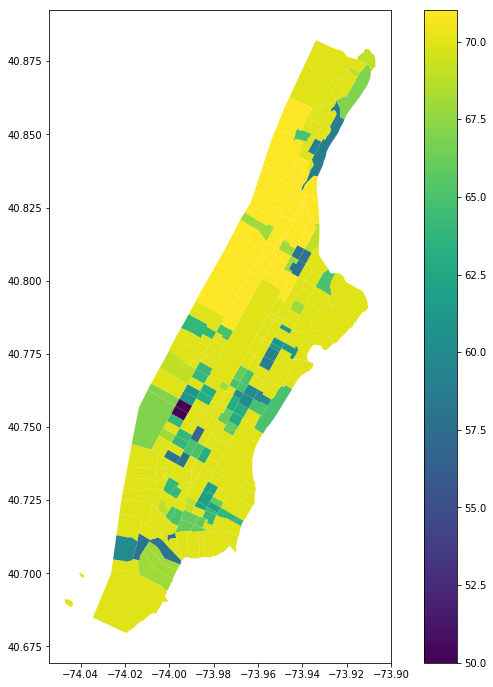

In [121]:
tracts.merge(df, on='region_id').plot(column='aqi', figsize=(12, 12), legend=True)

In [122]:
df.head()

,aqi,category,color,pollutant,lat,lng,region_id
0,70,Good air quality,#84CF33,o3,40.722673,-73.969787,36061002400
1,70,Good air quality,#84CF33,o3,40.762604,-73.972131,36061011202
2,70,Good air quality,#84CF33,o3,40.728956,-73.971355,36061004400
3,70,Good air quality,#84CF33,o3,40.721711,-74.014607,36061003900
4,70,Good air quality,#84CF33,o3,40.732164,-73.970268,36061006000
